# Intro To Pandas and Datasets


The data consists of weather conditions at Mount Rainier, WA from 1949 to 2010.  We will

## Load and Inspect Data
- open your Jupyter notebook
- load the dataset  

## Identify & Fix Problem(s)
- inspect the data
- what is the problem (Breakout)
- Fixing the problem

## Organize The Data
- group by year and by year and month

## Visualize
- visualize the last decade of data  
- compute the average of the max and min temp per day and visualize
- compute the temperature range per day and visualize

# SOLUTION

### Load Modules

We'll load the modules we expect to need for these questions:

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 4]

## Load and Inspect Data
- open your Jupyter notebook
- load the dataset

In [3]:
location = '../data/'
files = os.listdir(location)
files

['mount_rainier_daily.csv']

In [4]:
df = pd.read_csv(location + 'mount_rainier_daily.csv')

### Inspect Data

In [5]:
df

,year,month,date,precipitation,min_temp,max_temp,windspeed
0,1949,1,1,6.43,-6.43,-13.91,4.17
1,1949,1,2,0.93,-10.98,-18.32,2.67
2,1949,1,3,0.00,-10.05,-21.38,0.39
3,1949,1,4,0.00,-9.47,-19.81,1.70
4,1949,1,5,3.97,-5.05,-15.21,1.75
...,...,...,...,...,...,...,...
22640,2010,12,27,33.65,-5.38,-8.81,3.65
22641,2010,12,28,15.20,-3.47,-7.57,5.16
22642,2010,12,29,8.75,-3.51,-11.46,5.66
22643,2010,12,30,0.35,-10.46,-15.73,3.87


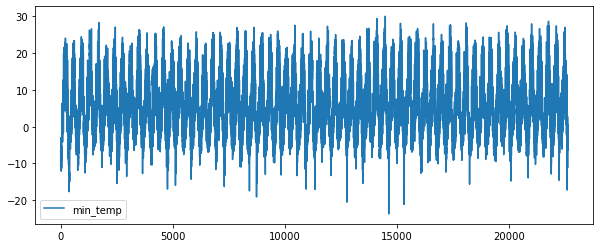

In [6]:
ax = df.plot(y='min_temp')
plt.show()

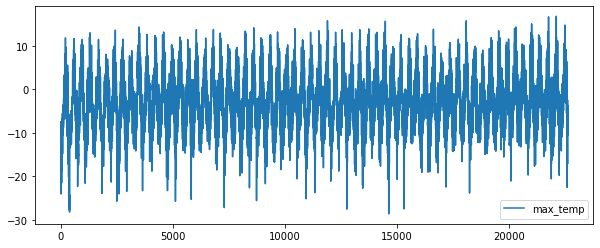

In [7]:
ax = df.plot(y='max_temp')
plt.show()

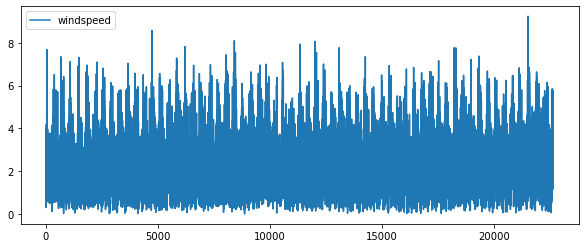

In [8]:
ax = df.plot(y='windspeed')
plt.show()

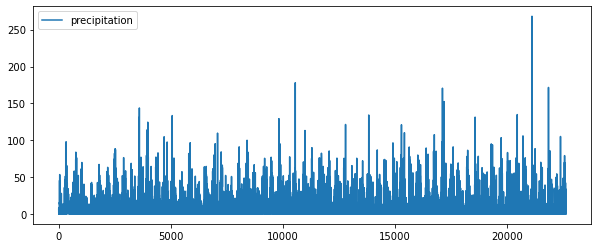

In [9]:
ax = df.plot(y='precipitation')
plt.show()

In [10]:
df.describe()

,year,month,date,precipitation,min_temp,max_temp,windspeed
count,22645.000000,22645.000000,22645.000000,22645.000000,22645.000000,22645.000000,22645.000000
mean,1979.500331,6.523029,15.729344,7.342919,5.637403,-3.385471,2.358604
std,17.895530,3.448752,8.800163,13.220742,8.294845,5.896965,1.203298
min,1949.000000,1.000000,1.000000,0.000000,-23.730000,-28.630000,0.010000
25%,1964.000000,4.000000,8.000000,0.000000,-1.000000,-7.540000,1.490000
50%,1980.000000,7.000000,16.000000,1.100000,4.320000,-3.730000,2.210000
75%,1995.000000,10.000000,23.000000,9.600000,11.880000,0.660000,3.060000
max,2010.000000,12.000000,31.000000,268.200000,30.050000,16.830000,9.240000


## Identify & Fix Problem(s)
- inspect the data
- what is the problem (Breakout)
- Fixing the problem

### Found A Problem

It looks like the min and max temp columns are interchanged...  That should be easy to fix.

In [11]:
df.columns

Index(['year', 'month', 'date', 'precipitation', 'min_temp', 'max_temp',
       'windspeed'],
      dtype='object')

In [12]:
df.columns = ['year', 'month', 'date', 'precipitation', 'max_temp', 'min_temp','windspeed']

In [13]:
df.describe()

,year,month,date,precipitation,max_temp,min_temp,windspeed
count,22645.000000,22645.000000,22645.000000,22645.000000,22645.000000,22645.000000,22645.000000
mean,1979.500331,6.523029,15.729344,7.342919,5.637403,-3.385471,2.358604
std,17.895530,3.448752,8.800163,13.220742,8.294845,5.896965,1.203298
min,1949.000000,1.000000,1.000000,0.000000,-23.730000,-28.630000,0.010000
25%,1964.000000,4.000000,8.000000,0.000000,-1.000000,-7.540000,1.490000
50%,1980.000000,7.000000,16.000000,1.100000,4.320000,-3.730000,2.210000
75%,1995.000000,10.000000,23.000000,9.600000,11.880000,0.660000,3.060000
max,2010.000000,12.000000,31.000000,268.200000,30.050000,16.830000,9.240000


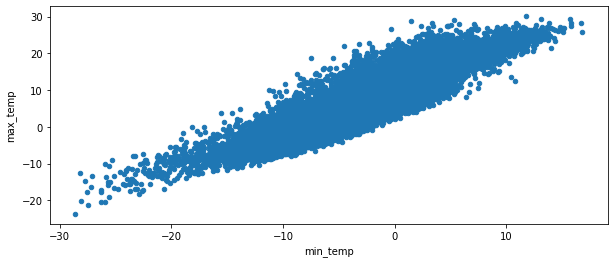

In [14]:
df.plot.scatter(x='min_temp',y='max_temp')

## Organize The Data
- group by year and by year and month 

# Group by year,month

In [15]:
sub = df.groupby(['year','month'], as_index=False).mean()
sub.head()

,year,month,date,precipitation,max_temp,min_temp,windspeed
0,1949,1,16.0,1.500968,-7.606452,-17.021935,1.886129
1,1949,2,14.5,14.722143,-4.364286,-12.782857,3.493929
2,1949,3,16.0,3.674516,0.491290,-8.519677,2.012258
3,1949,4,15.5,3.277000,5.412333,-7.044667,1.753667
4,1949,5,16.0,1.510323,11.109355,-3.587097,1.959677


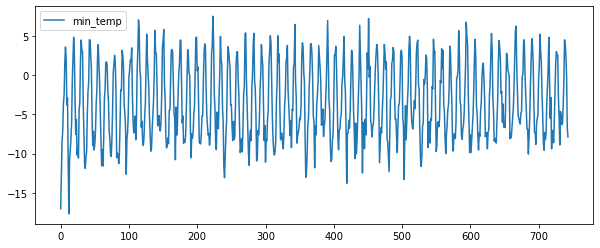

In [16]:
sub.plot(y='min_temp')

In [17]:
sub['label'] = sub.apply(lambda x: '%d_%02d' % (x['year'], x['month']), axis=1)

## Visualize
- visualize the last decade of data  
- compute the average of the max and min temp per day and visualize
- compute the temperature range per day and visualize

### Visualize Last Decade

In [18]:
tmp = sub[sub['year'] >=2000]

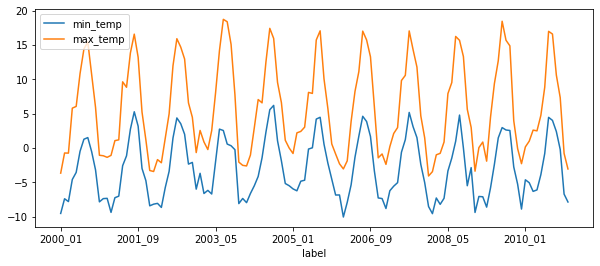

In [19]:
ax = tmp.plot(x='label',y='min_temp')
tmp.plot(ax=ax, x='label',y='max_temp')
plt.show()

# Compute Average of Min and Max Temp

In [34]:
X = (df['min_temp'] + df['max_temp']) / 2
df['avg_temp'] = X
df.head()

,year,month,date,precipitation,max_temp,min_temp,windspeed,avg_temp,temp_range
0,1949,1,1,6.43,-6.43,-13.91,4.17,-10.170,7.48
1,1949,1,2,0.93,-10.98,-18.32,2.67,-14.650,7.34
2,1949,1,3,0.00,-10.05,-21.38,0.39,-15.715,11.33
3,1949,1,4,0.00,-9.47,-19.81,1.70,-14.640,10.34
4,1949,1,5,3.97,-5.05,-15.21,1.75,-10.130,10.16


In [39]:
df['label'] = df.apply(lambda x: '%d_%02d' % (x['year'], x['month']), axis=1)

In [40]:
tmp = df[df['year'] >=2000]
tmp

,year,month,date,precipitation,max_temp,min_temp,windspeed,avg_temp,temp_range,label
18627,2000,1,1,32.58,-4.35,-8.48,3.76,-6.415,4.13,2000_01
18628,2000,1,2,16.15,-6.23,-10.34,4.44,-8.285,4.11,2000_01
18629,2000,1,3,51.92,-4.10,-11.89,2.73,-7.995,7.79,2000_01
18630,2000,1,4,20.12,-3.50,-7.01,5.06,-5.255,3.51,2000_01
18631,2000,1,5,0.73,-4.94,-9.06,2.96,-7.000,4.12,2000_01
...,...,...,...,...,...,...,...,...,...,...
22640,2010,12,27,33.65,-5.38,-8.81,3.65,-7.095,3.43,2010_12
22641,2010,12,28,15.20,-3.47,-7.57,5.16,-5.520,4.10,2010_12
22642,2010,12,29,8.75,-3.51,-11.46,5.66,-7.485,7.95,2010_12
22643,2010,12,30,0.35,-10.46,-15.73,3.87,-13.095,5.27,2010_12


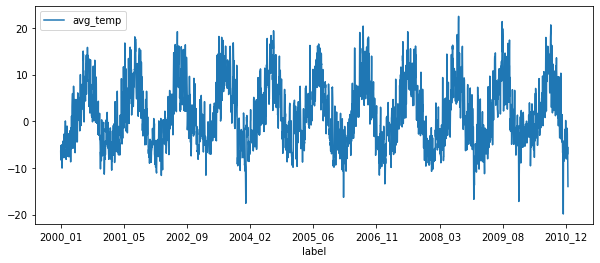

In [43]:
#ax = tmp.plot(x='label',y='avg_temp')
tmp.plot(x='label',y='avg_temp')
plt.show()

# Compute The Temperature Range

In [44]:
df['temp_range'] = df['max_temp'] - df['min_temp']

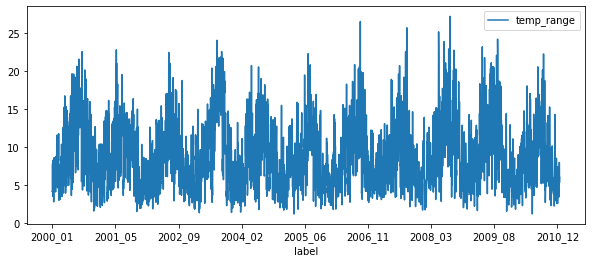

In [46]:
tmp = df[df['year'] >=2000]

tmp.plot(x='label',y='temp_range')
plt.show()